# 0.2.2 El método del gradiente descendente

Notas:
- Gradiente descendente por que va encontra del signo de la derivada (gradiente)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.2.2.1 Función de Rosenbrock

$$ f(x,y) = 100 * (x^2 − y)^2 + (1 − x)^2 $$
$$ x \varepsilon [−2.048,2.048]  $$
$$ y \varepsilon [-1,4]  $$
$$ f(1,1) = 0 $$

In [4]:
#
# Función
#
def f(x, y):
    return 100 * (x ** 2 - y) ** 2 + (1 - x) ** 2

In [5]:
#
# Gradiente
#
def g(x, y):
    grad_x = 400 * x * (x ** 2 - y) - 2 * (1 - x)
    grad_y = -200 * (x ** 2 - y)
    return grad_x, grad_y


In [6]:
#
# Función de mejora
#
def improve(x, y, mu):
    grad_x, grad_y = g(x, y)
    x = x - mu * grad_x
    y = y - mu * grad_y
    return x, y

In [7]:
#
# Punto de inicio
#
x = -0.5
y = +3.5

history = {"x": [x], "y": [y], "f": [f(x, y)]}

In [8]:
# for epoch in range(50):
#     x, y = improve(x, y, mu=0.001)
#     history["x"].append(x)
#     history["y"].append(y)
#     history["f"].append(f(x, y))

#
# Ultimo resultado obtenido
#
# print("      x = {:6.5f}\n      y = {:+6.5f}\nf(x, y) = {:+6.5f}".format(x, y, f(x, y)))

In [9]:
def epocas(x, y, epocas, learning_rate):
    
    history = {"x": [x], "y": [y], "f": [f(x, y)]}
    
    for epoch in range(epocas):
        x, y = improve(x, y, mu=learning_rate)
        history["x"].append(x)
        history["y"].append(y)
        history["f"].append(f(x, y))

    #
    # Ultimo resultado obtenido
    #
    # print("      x = {:6.5f}\n      y = {:+6.5f}\nf(x, y) = {:+6.5f}".format(x, y, f(x, y)))
    
    return history

In [10]:
history = epocas(-0.5, +3.5, 50, 0.001)

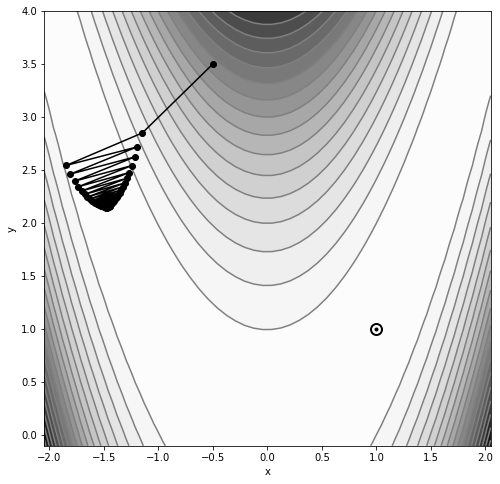

In [11]:
def plot_contour():

    X = np.linspace(start=-2.048, stop=2.048, num=50)
    Y = np.linspace(start=-0.1, stop=4.0, num=50)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    plt.subplots(figsize=(8, 8))
    plt.gca().contourf(X, Y, Z, cmap=cm.Greys, levels=20, alpha=1.0)
    plt.gca().contour(X, Y, Z, colors="gray", levels=20)
    plt.plot(
        [1], [1], "o", color="black", fillstyle="none", markersize=11, markeredgewidth=2
    )
    plt.plot([1], [1], ".", color="black")
    plt.xlabel("x")
    plt.ylabel("y")


plot_contour()
plt.plot(history["x"], history["y"], "o-", color="k")
plt.show()

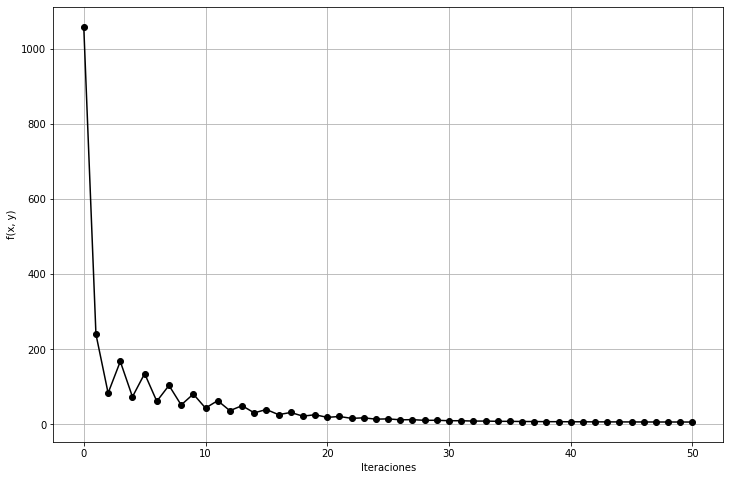

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(history["f"], "o-k")
plt.xlabel("Iteraciones")
plt.ylabel("f(x, y)")
plt.grid()

In [13]:
history = epocas(0, 4, 50, 0.001)

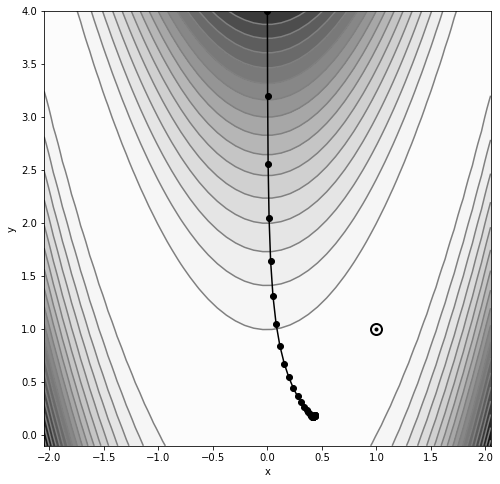

In [14]:
plot_contour()
plt.plot(history["x"], history["y"], "o-", color="k")
plt.show()

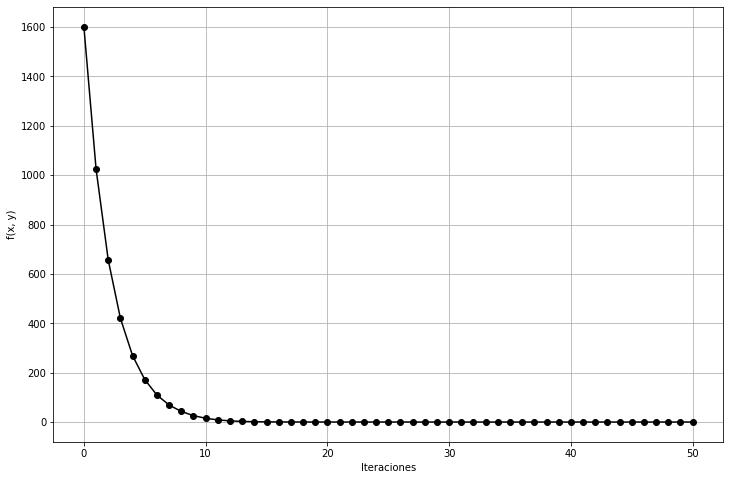

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(history["f"], "o-k")
plt.xlabel("Iteraciones")
plt.ylabel("f(x, y)")
plt.grid()

In [16]:
print('ok_')

ok_
